In [1]:
from IPython.display import display,HTML
def dhtml(str):
    display(HTML("""<style>
    @import url('https://fonts.googleapis.com/css?family=Ewert&effect=3d');      
    </style><h1 class='font-effect-3d' style='font-family:Ewert; color:#ff355e'>
    %s</h1>"""%str))
dhtml('Code Modules & Helpful Functions')    

[Google Colaboratory Version](https://colab.research.google.com/drive/1UXD9nxTS9s2EGkiRst59NREqX9Eiw3Zp)

In [2]:
import numpy as np,pylab as pl,pandas as pd
import h5py,tensorflow as tf
import tensorflow_hub as th
from sklearn.model_selection import train_test_split

In [3]:
fpath1='../input/traditional-decor-patterns/'
fpath3='../input/classification-of-handwritten-letters/'
fpath4='../input/flower-color-images/'
fw='weights.best.hdf5'
def prepro(x_train,y_train,x_test,y_test,n_class):
    n=int(len(x_test)/2)    
    x_valid,y_valid=x_test[:n],y_test[:n]
    x_test,y_test=x_test[n:],y_test[n:]
    cy_train=tf.keras.utils.to_categorical(y_train,n_class) 
    cy_valid=tf.keras.utils.to_categorical(y_valid,n_class)
    cy_test=tf.keras.utils.to_categorical(y_test,n_class)
    df=pd.DataFrame([[x_train.shape,x_valid.shape,x_test.shape],
                     [y_train.shape,y_valid.shape,y_test.shape],
                     [cy_train.shape,cy_valid.shape,cy_test.shape]],
                    columns=['train','valid','test'],
                    index=['images','labels','encoded labels'])
    display(df)
    return [[x_train,x_valid,x_test],
            [y_train,y_valid,y_test],
            [cy_train,cy_valid,cy_test]]
def cb(fw):
    early_stopping=tf.keras.callbacks\
    .EarlyStopping(monitor='val_loss',patience=20,verbose=2)
    checkpointer=tf.keras.callbacks\
    .ModelCheckpoint(filepath=fw,save_best_only=True,verbose=2)
    lr_reduction=tf.keras.callbacks\
    .ReduceLROnPlateau(monitor='val_loss',verbose=2,
                       patience=5,factor=.8)
    return [checkpointer,early_stopping,lr_reduction]
def display_resize(x_train,x_valid,x_test,
                   y_valid,cy_valid,pixels):
    x_train=tf.image.resize(x_train,[pixels,pixels])
    x_valid=tf.image.resize(x_valid,[pixels,pixels])
    x_test=tf.image.resize(x_test,[pixels,pixels])
    img=x_valid[1]
    lbl='one example of resized images \nlabel: '+\
     str(y_valid[1][0])+'=>'+str(cy_valid[1])+\
     '\nshape: '+str(img.shape)
    pl.imshow(img); pl.title(lbl)
    return [x_train,x_valid,x_test]
def premodel(pix,den,mh,lbl):
    model=tf.keras.Sequential([
        tf.keras.layers.Input((pix,pix,3),
                              name='input'),
        th.KerasLayer(mh,trainable=True),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(den,activation='relu'),
        tf.keras.layers.Dropout(rate=.5),
        tf.keras.layers.Dense(lbl,activation='softmax')])
    model.compile(optimizer='adam',metrics=['accuracy'],
                  loss='categorical_crossentropy')
    display(model.summary())
    return model

In [4]:
dhtml('Data Loading & Preprocessing <br/> #1')
f=h5py.File(fpath1+'DecorColorImages.h5','r') 
keys=list(f.keys()); print(keys)
images=np.array(f[keys[2]])/255
labels=np.array(f[keys[1]]).astype('int').reshape(-1,1)-1
x_train1,x_test1,y_train1,y_test1=\
train_test_split(images,labels,test_size=.2,random_state=1)
del images,labels
[[x_train1,x_valid1,x_test1],
 [y_train1,y_valid1,y_test1],
 [cy_train1,cy_valid1,cy_test1]]=\
prepro(x_train1,y_train1,x_test1,y_test1,7)

['countries', 'decors', 'images', 'types']


,train,valid,test
images,"(388, 150, 150, 3)","(48, 150, 150, 3)","(49, 150, 150, 3)"
labels,"(388, 1)","(48, 1)","(49, 1)"
encoded labels,"(388, 7)","(48, 7)","(49, 7)"


In [5]:
dhtml('#2')
(x_train2,y_train2),(x_test2,y_test2)=\
tf.keras.datasets.cifar10.load_data()
[[x_train2,x_valid2,x_test2],
 [y_train2,y_valid2,y_test2],
 [cy_train2,cy_valid2,cy_test2]]=\
prepro(x_train2/255,y_train2,x_test2/255,y_test2,10)

170500096/170498071 [==============================] - 4s 0us/step


,train,valid,test
images,"(50000, 32, 32, 3)","(5000, 32, 32, 3)","(5000, 32, 32, 3)"
labels,"(50000, 1)","(5000, 1)","(5000, 1)"
encoded labels,"(50000, 10)","(5000, 10)","(5000, 10)"


In [6]:
dhtml('#3')
f=h5py.File(fpath3+'LetterColorImages_123.h5','r') 
keys=list(f.keys()); print(keys)
images=np.array(f[keys[1]])/255
labels=np.array(f[keys[2]]).astype('int').reshape(-1,1)-1
x_train3,x_test3,y_train3,y_test3=\
train_test_split(images,labels,test_size=.2,random_state=1)
del images,labels
[[x_train3,x_valid3,x_test3],
 [y_train3,y_valid3,y_test3],
 [cy_train3,cy_valid3,cy_test3]]=\
prepro(x_train3,y_train3,x_test3,y_test3,33)

['backgrounds', 'images', 'labels']


,train,valid,test
images,"(11352, 32, 32, 3)","(1419, 32, 32, 3)","(1419, 32, 32, 3)"
labels,"(11352, 1)","(1419, 1)","(1419, 1)"
encoded labels,"(11352, 33)","(1419, 33)","(1419, 33)"


In [7]:
dhtml('#4')
f=h5py.File(fpath4+'FlowerColorImages.h5','r') 
keys=list(f.keys()); print(keys)
images=np.array(f[keys[0]])/255
labels=np.array(f[keys[1]]).astype('int').reshape(-1,1)
x_train4,x_test4,y_train4,y_test4=\
train_test_split(images,labels,test_size=.2,random_state=1)
del images,labels
[[x_train4,x_valid4,x_test4],
 [y_train4,y_valid4,y_test4],
 [cy_train4,cy_valid4,cy_test4]]=\
prepro(x_train4,y_train4,x_test4,y_test4,10)

['images', 'labels']


,train,valid,test
images,"(168, 128, 128, 3)","(21, 128, 128, 3)","(21, 128, 128, 3)"
labels,"(168, 1)","(21, 1)","(21, 1)"
encoded labels,"(168, 10)","(21, 10)","(21, 10)"


In [8]:
dhtml('Pre-Trained Saved Models')
dhtml('#1')
[handle_base,pixels]=["mobilenet_v2_100_192",192]
mhandle="https://tfhub.dev/google/imagenet/{}/feature_vector/4"\
.format(handle_base)

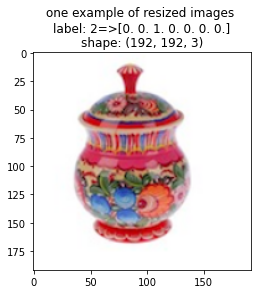

In [9]:
[x_train1,x_valid1,x_test1]=\
display_resize(x_train1,x_valid1,x_test1,
               y_valid1,cy_valid1,pixels)

In [10]:
model=premodel(pixels,1024,mhandle,7)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1311744   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 7175      
Total params: 3,576,903
Trainable params: 3,542,791
Non-trainable params: 34,112
_________________________________________________________________


None

In [11]:
history=model.fit(x=x_train1,y=cy_train1,batch_size=16,
                  epochs=50,callbacks=cb(fw),
                  validation_data=(x_valid1,cy_valid1))

Train on 388 samples, validate on 48 samples
Epoch 1/50
384/388 [============================>.] - ETA: 0s - loss: 1.4210 - accuracy: 0.5938
Epoch 00001: val_loss improved from inf to 11.62206, saving model to weights.best.hdf5
388/388 [==============================] - 13s 32ms/sample - loss: 1.4216 - accuracy: 0.5928 - val_loss: 11.6221 - val_accuracy: 0.2292
Epoch 2/50
384/388 [============================>.] - ETA: 0s - loss: 0.6099 - accuracy: 0.8385
Epoch 00002: val_loss improved from 11.62206 to 7.72244, saving model to weights.best.hdf5
388/388 [==============================] - 2s 6ms/sample - loss: 0.6186 - accuracy: 0.8376 - val_loss: 7.7224 - val_accuracy: 0.3125
Epoch 3/50
384/388 [============================>.] - ETA: 0s - loss: 0.5381 - accuracy: 0.8698
Epoch 00003: val_loss improved from 7.72244 to 4.66733, saving model to weights.best.hdf5
388/388 [==============================] - 2s 6ms/sample - loss: 0.5369 - accuracy: 0.8711 - val_loss: 4.6673 - val_accuracy: 0.56

In [12]:
model.load_weights(fw)
model.evaluate(x_test1,cy_test1)

49/49 [==============================] - 1s 22ms/sample - loss: 0.2435 - accuracy: 0.9592


[0.24348315474938373, 0.9591837]

In [13]:
[handle_base,pixels]=["mobilenet_v2_140_224",224]
mhandle="https://tfhub.dev/google/imagenet/{}/feature_vector/4"\
.format(handle_base)

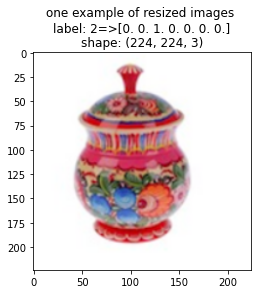

In [14]:
[x_train1,x_valid1,x_test1]=\
display_resize(x_train1,x_valid1,x_test1,
               y_valid1,cy_valid1,pixels)

In [15]:
model=premodel(pixels,1024,mhandle,7)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1792)              4363712   
_________________________________________________________________
flatten_1 (Flatten)          (None, 1792)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1836032   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 7175      
Total params: 6,206,919
Trainable params: 6,158,983
Non-trainable params: 47,936
_________________________________________________________________


None

In [16]:
history=model.fit(x=x_train1,y=cy_train1,batch_size=16,
                  epochs=50,callbacks=cb(fw),
                  validation_data=(x_valid1,cy_valid1))

Train on 388 samples, validate on 48 samples
Epoch 1/50
384/388 [============================>.] - ETA: 0s - loss: 1.3979 - accuracy: 0.6276
Epoch 00001: val_loss improved from inf to 18.73658, saving model to weights.best.hdf5
388/388 [==============================] - 10s 26ms/sample - loss: 1.3894 - accuracy: 0.6289 - val_loss: 18.7366 - val_accuracy: 0.2500
Epoch 2/50
384/388 [============================>.] - ETA: 0s - loss: 0.9397 - accuracy: 0.7786
Epoch 00002: val_loss did not improve from 18.73658
388/388 [==============================] - 3s 7ms/sample - loss: 0.9397 - accuracy: 0.7784 - val_loss: 22.1145 - val_accuracy: 0.2083
Epoch 3/50
384/388 [============================>.] - ETA: 0s - loss: 0.8336 - accuracy: 0.7656
Epoch 00003: val_loss did not improve from 18.73658
388/388 [==============================] - 3s 7ms/sample - loss: 0.8265 - accuracy: 0.7680 - val_loss: 20.8747 - val_accuracy: 0.2708
Epoch 4/50
384/388 [============================>.] - ETA: 0s - loss: 0.

In [17]:
model.load_weights(fw)
model.evaluate(x_test1,cy_test1)
del x_train1,x_valid1,x_test1,\
y_train1,y_valid1,y_test1,\
cy_train1,cy_valid1,cy_test1

49/49 [==============================] - 1s 21ms/sample - loss: 0.2616 - accuracy: 0.9796


In [18]:
dhtml('#2')
[handle_base,pixels]=["mobilenet_v2_050_96",96]
mhandle="https://tfhub.dev/google/imagenet/{}/feature_vector/4"\
.format(handle_base)

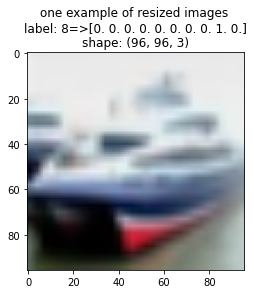

In [19]:
[x_train2,x_valid2,x_test2]=\
display_resize(x_train2,x_valid2,x_test2,
               y_valid2,cy_valid2,pixels)

In [20]:
model=premodel(pixels,512,mhandle,10)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 1280)              706224    
_________________________________________________________________
flatten_2 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               655872    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 1,367,226
Trainable params: 1,348,682
Non-trainable params: 18,544
_________________________________________________________________


None

In [21]:
history=model.fit(x=x_train2,y=cy_train2,batch_size=64,
                  epochs=10,callbacks=cb(fw),
                  validation_data=(x_valid2,cy_valid2))

Train on 50000 samples, validate on 5000 samples
Epoch 1/10
49984/50000 [============================>.] - ETA: 0s - loss: 0.6409 - accuracy: 0.8036
Epoch 00001: val_loss improved from inf to 0.60226, saving model to weights.best.hdf5
50000/50000 [==============================] - 44s 884us/sample - loss: 0.6410 - accuracy: 0.8036 - val_loss: 0.6023 - val_accuracy: 0.8186
Epoch 2/10
49984/50000 [============================>.] - ETA: 0s - loss: 0.4581 - accuracy: 0.8651
Epoch 00002: val_loss improved from 0.60226 to 0.60101, saving model to weights.best.hdf5
50000/50000 [==============================] - 37s 744us/sample - loss: 0.4581 - accuracy: 0.8651 - val_loss: 0.6010 - val_accuracy: 0.8230
Epoch 3/10
49920/50000 [============================>.] - ETA: 0s - loss: 0.3980 - accuracy: 0.8877
Epoch 00003: val_loss improved from 0.60101 to 0.57938, saving model to weights.best.hdf5
50000/50000 [==============================] - 37s 732us/sample - loss: 0.3980 - accuracy: 0.8877 - val_l

In [22]:
model.load_weights(fw)
model.evaluate(x_test2,cy_test2)

5000/5000 [==============================] - 1s 255us/sample - loss: 0.4684 - accuracy: 0.8758


[0.4683812877655029, 0.8758]

In [23]:
#[handle_base,pixels]=["mobilenet_v2_075_96",96]
#mhandle="https://tfhub.dev/google/imagenet/{}/feature_vector/4"\
#.format(handle_base)

In [24]:
#model=premodel(pixels,1024,mhandle,10)

In [25]:
#history=model.fit(x=x_train2,y=cy_train2,batch_size=64,
#                  epochs=10,callbacks=cb(fw),
#                  validation_data=(x_valid2,cy_valid2))

In [26]:
#model.load_weights(fw)
#model.evaluate(x_test2,cy_test2)
del x_train2,x_valid2,x_test2,\
y_train2,y_valid2,y_test2,\
cy_train2,cy_valid2,cy_test2

In [27]:
dhtml('#3')
[handle_base,pixels]=["mobilenet_v2_050_96",96]
mhandle="https://tfhub.dev/google/imagenet/{}/feature_vector/4"\
.format(handle_base)

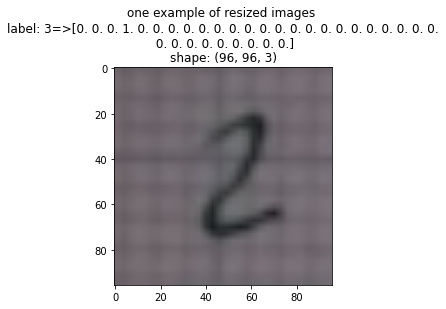

In [28]:
[x_train3,x_valid3,x_test3]=\
display_resize(x_train3,x_valid3,x_test3,
               y_valid3,cy_valid3,pixels)

In [29]:
model=premodel(pixels,512,mhandle,33)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_3 (KerasLayer)   (None, 1280)              706224    
_________________________________________________________________
flatten_3 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               655872    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 33)                16929     
Total params: 1,379,025
Trainable params: 1,360,481
Non-trainable params: 18,544
_________________________________________________________________


None

In [30]:
history=model.fit(x=x_train3,y=cy_train3,batch_size=64,
                  epochs=50,callbacks=cb(fw),
                  validation_data=(x_valid3,cy_valid3))

Train on 11352 samples, validate on 1419 samples
Epoch 1/50
11328/11352 [============================>.] - ETA: 0s - loss: 1.4040 - accuracy: 0.6133
Epoch 00001: val_loss improved from inf to 1.60228, saving model to weights.best.hdf5
11352/11352 [==============================] - 15s 1ms/sample - loss: 1.4028 - accuracy: 0.6137 - val_loss: 1.6023 - val_accuracy: 0.6342
Epoch 2/50
11328/11352 [============================>.] - ETA: 0s - loss: 0.4492 - accuracy: 0.8792
Epoch 00002: val_loss improved from 1.60228 to 0.57229, saving model to weights.best.hdf5
11352/11352 [==============================] - 9s 768us/sample - loss: 0.4488 - accuracy: 0.8794 - val_loss: 0.5723 - val_accuracy: 0.8436
Epoch 3/50
11264/11352 [============================>.] - ETA: 0s - loss: 0.3159 - accuracy: 0.9207
Epoch 00003: val_loss did not improve from 0.57229
11352/11352 [==============================] - 8s 714us/sample - loss: 0.3158 - accuracy: 0.9208 - val_loss: 0.6607 - val_accuracy: 0.8598
Epoch 4/

In [31]:
model.load_weights(fw)
model.evaluate(x_test3,cy_test3)
del x_train3,x_valid3,x_test3,\
y_train3,y_valid3,y_test3,\
cy_train3,cy_valid3,cy_test3

1419/1419 [==============================] - 0s 262us/sample - loss: 0.1924 - accuracy: 0.9697


In [32]:
dhtml('#4')
[handle_base,pixels]=["mobilenet_v1_100_128",128]
mhandle="https://tfhub.dev/google/imagenet/{}/feature_vector/4"\
.format(handle_base)

In [33]:
model=premodel(pixels,512,mhandle,10)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_4 (KerasLayer)   (None, 1024)              3228864   
_________________________________________________________________
flatten_4 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 3,758,794
Trainable params: 3,736,906
Non-trainable params: 21,888
_________________________________________________________________


None

In [34]:
history=model.fit(x=x_train4,y=cy_train4,batch_size=12,
                  epochs=50,callbacks=cb(fw),
                  validation_data=(x_valid4,cy_valid4))

Train on 168 samples, validate on 21 samples
Epoch 1/50
156/168 [==========================>...] - ETA: 0s - loss: 2.2493 - accuracy: 0.4231
Epoch 00001: val_loss improved from inf to 0.69498, saving model to weights.best.hdf5
168/168 [==============================] - 4s 26ms/sample - loss: 2.1585 - accuracy: 0.4345 - val_loss: 0.6950 - val_accuracy: 0.8095
Epoch 2/50
156/168 [==========================>...] - ETA: 0s - loss: 1.0570 - accuracy: 0.7885
Epoch 00002: val_loss did not improve from 0.69498
168/168 [==============================] - 0s 2ms/sample - loss: 1.0901 - accuracy: 0.7798 - val_loss: 1.3606 - val_accuracy: 0.7143
Epoch 3/50
144/168 [========================>.....] - ETA: 0s - loss: 0.5315 - accuracy: 0.8819
Epoch 00003: val_loss did not improve from 0.69498
168/168 [==============================] - 0s 2ms/sample - loss: 0.5285 - accuracy: 0.8810 - val_loss: 1.5171 - val_accuracy: 0.6667
Epoch 4/50
132/168 [======================>.......] - ETA: 0s - loss: 0.5810 - 

In [35]:
model.load_weights(fw)
model.evaluate(x_test4,cy_test4)

21/21 [==============================] - 0s 3ms/sample - loss: 0.8298 - accuracy: 0.7619


[0.8298192024230957, 0.7619048]

In [36]:
[handle_base,pixels]=["mobilenet_v2_130_224",224]
mhandle="https://tfhub.dev/google/imagenet/{}/feature_vector/4"\
.format(handle_base)

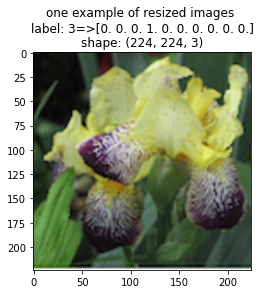

In [37]:
[x_train4,x_valid4,x_test4]=\
display_resize(x_train4,x_valid4,x_test4,
               y_valid4,cy_valid4,pixels)

In [38]:
model=premodel(pixels,512,mhandle,10)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_5 (KerasLayer)   (None, 1664)              3766048   
_________________________________________________________________
flatten_5 (Flatten)          (None, 1664)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               852480    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                5130      
Total params: 4,623,658
Trainable params: 4,579,402
Non-trainable params: 44,256
_________________________________________________________________


None

In [39]:
history=model.fit(x=x_train4,y=cy_train4,batch_size=12,
                  epochs=50,callbacks=cb(fw),
                  validation_data=(x_valid4,cy_valid4))

Train on 168 samples, validate on 21 samples
Epoch 1/50
156/168 [==========================>...] - ETA: 0s - loss: 2.2688 - accuracy: 0.3462
Epoch 00001: val_loss improved from inf to 5.63618, saving model to weights.best.hdf5
168/168 [==============================] - 12s 72ms/sample - loss: 2.2032 - accuracy: 0.3750 - val_loss: 5.6362 - val_accuracy: 0.2381
Epoch 2/50
156/168 [==========================>...] - ETA: 0s - loss: 1.2414 - accuracy: 0.6538
Epoch 00002: val_loss improved from 5.63618 to 4.38874, saving model to weights.best.hdf5
168/168 [==============================] - 2s 10ms/sample - loss: 1.2065 - accuracy: 0.6726 - val_loss: 4.3887 - val_accuracy: 0.5238
Epoch 3/50
156/168 [==========================>...] - ETA: 0s - loss: 1.0188 - accuracy: 0.7500
Epoch 00003: val_loss did not improve from 4.38874
168/168 [==============================] - 1s 7ms/sample - loss: 1.0010 - accuracy: 0.7440 - val_loss: 4.7934 - val_accuracy: 0.4286
Epoch 4/50
156/168 [==================

In [40]:
model.load_weights(fw)
model.evaluate(x_test4,cy_test4)

21/21 [==============================] - 0s 9ms/sample - loss: 1.3532 - accuracy: 0.7619


[1.3532131910324097, 0.7619048]

In [41]:
dhtml('In Progress')